In [1]:
from datavolley import read_dv
import datavolley.pycourt as pycourt
import datavolley.pycourt as half_pycourt 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", "is_categorical_dtype")
warnings.filterwarnings("ignore", "use_inf_as_na")

In [2]:
dvf = read_dv.DataVolley()
plays = dvf.get_plays()

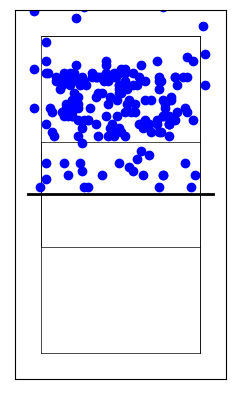

In [3]:
attacks_data= plays[(plays['skill'] == 'Attack') & (plays.home_team==dvf.home_team)] 
coordinate_df = attacks_data[['start_coordinate_x',
                          'start_coordinate_y',
                          'end_coordinate_x',
                          'end_coordinate_y']]

def plot_coordinates(coordinates):
    pycourt.pycourt()
    # Plot the coordinates
    plt.scatter(coordinates['end_coordinate_x'], coordinates['end_coordinate_y'], color='blue')
    plt.show(block=True)

plot_coordinates(coordinate_df)

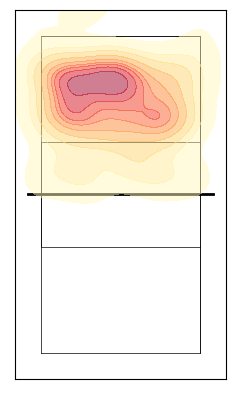

In [4]:
# heatmap of the end direction of attacks
fig, ax = plt.subplots()
pycourt.pycourt(ax)
sns.kdeplot(x=coordinate_df['end_coordinate_x'], y=coordinate_df['end_coordinate_y'], ax=ax, cmap="YlOrRd", fill=True, alpha=0.5)
plt.show()


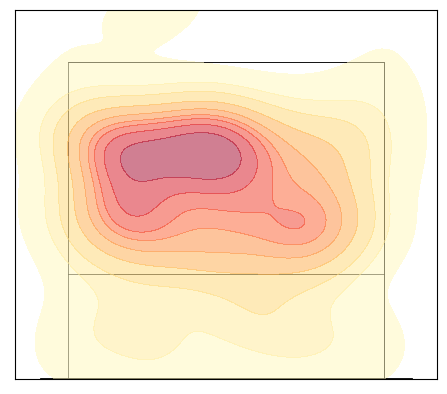

In [5]:
# Using the function to create the heatmap
# Creating the volleyball court
fig, ax = plt.subplots()
pycourt.half_pycourt(ax)
# Creating the heatmap
sns.kdeplot(x=coordinate_df['end_coordinate_x'], y=coordinate_df['end_coordinate_y'], ax=ax, cmap="YlOrRd", fill=True, alpha=0.5)
plt.show()

In [7]:
attacks_data= plays[(plays['skill'] == 'Attack') & (plays.home_team==dvf.home_team)] 